<a href="https://colab.research.google.com/github/LanaSina/lpf_upper/blob/LanaSina-tutorial-1/lpf_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running LPF on colab

Original code: https://github.com/cxinsys/lpf

Paper: https://academic.oup.com/bioinformatics/article/39/7/btad430/7221539

Just run all cells and get a ladybug.

## Setup

Pull code

In [1]:
!git clone https://github.com/LanaSina/lpf_upper.git

Cloning into 'lpf_upper'...
remote: Enumerating objects: 2192, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 2192 (delta 26), reused 13 (delta 5), pack-reused 2142
Receiving objects: 100% (2192/2192), 36.15 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (1439/1439), done.


Install LPF

In [ ]:
!python "lpf_upper/setup.py" install

In [7]:
%pwd
%ls
%cd lpf_upper
!pip install -r requirements.txt

build/  dist/  lpf.egg-info/  lpf_upper/  sample_data/
/content/lpf_upper
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00


Install PyGMO

In [4]:
# TODO !pip install pygmo -c conda-forge

## Solve one parameter set

From: Tutorial 1

In [8]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

/content/lpf_upper/lpf/array/module.py:8: UserWarning: Cannot use GPU computing based on CuPy.
  warnings.warn("Cannot use GPU computing based on CuPy.")
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling 

In [31]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 5000 #500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [32]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [33]:
# Create a dict for parameters.
param_dict = {
    "u0": 2.0, "v0": 1.0,
    "Du": 0.0005, "Dv": 0.075,
    "ru": 0.18, "rv": 0.02874,
    "su": 0.001, "sv": 0.025,
    "k": 0.084,
    "mu": 0.08
}

In [34]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [ ]:
param_dict

In [36]:
model_dicts = []
model_dicts.append(param_dict)

In [37]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [38]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [39]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=10000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 9.72104e-03 sec.
- [Duration] : 2.45530e+00 sec.
Elapsed time: 2.456587 sec.


In [40]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1  models


In [41]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
dpath_images

'/content/lpf_upper/output/experiment_batch_20230820-130832/model_1'

In [42]:
!ls {dpath_images}

ladybird_0001.png  pattern_0001.png


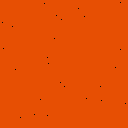

In [43]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_0001.png"))
img_pattern

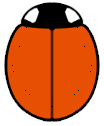

In [44]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_0001.png"))
img_ladybird

In [46]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


In [47]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)

model_dict

{'model': 'LiawModel',
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.0,
 'v0': 1.0,
 'n_init_pts': 25,
 'init_pts_0': [16, 84],
 'init_pts_1': [100, 101],
 'init_pts_2': [57, 47],
 'init_pts_3': [117, 20],
 'init_pts_4': [98, 86],
 'init_pts_5': [114, 34],
 'init_pts_6': [69, 15],
 'init_pts_7': [86, 64],
 'init_pts_8': [63, 48],
 'init_pts_9': [38, 54],
 'init_pts_10': [48, 3],
 'init_pts_11': [15, 56],
 'init_pts_12': [26, 12],
 'init_pts_13': [67, 115],
 'init_pts_14': [103, 125],
 'init_pts_15': [115, 47],
 'init_pts_16': [2, 120],
 'init_pts_17': [86, 100],
 'init_pts_18': [49, 120],
 'init_pts_19': [82, 60],
 'init_pts_20': [99, 40],
 'init_pts_21': [3, 44],
 'init_pts_22': [8, 78],
 'init_pts_23': [19, 61],
 'init_pts_24': [22, 2],
 'solver': 'EulerSolver',
 'dt': 0.01,
 'n_iters': 5000,
 'Du': 0.0005000000237487257,
 'Dv': 0.07500000298023224,
 'ru': 0.18000000715255737,

In [48]:
from lpf.visualization import merge_single_timeseries

In [ ]:
# Errors happen here because I changed the simulation time to a very small t
# Visualize the temporal evolution of ladybird by merging images.
img_ladybirds = merge_single_timeseries(dpath_input=dpath_images,
                                        n_cols=10,
                                        infile_header="ladybird",
                                        ratio_resize=0.5,
                                        text_format="t = ",
                                        font_size=10,
                                        text_margin_ratio=.1)
img_ladybirds

In [ ]:
img_ladybirds.save(pjoin(dpath_output, "output_ladybird.png"))

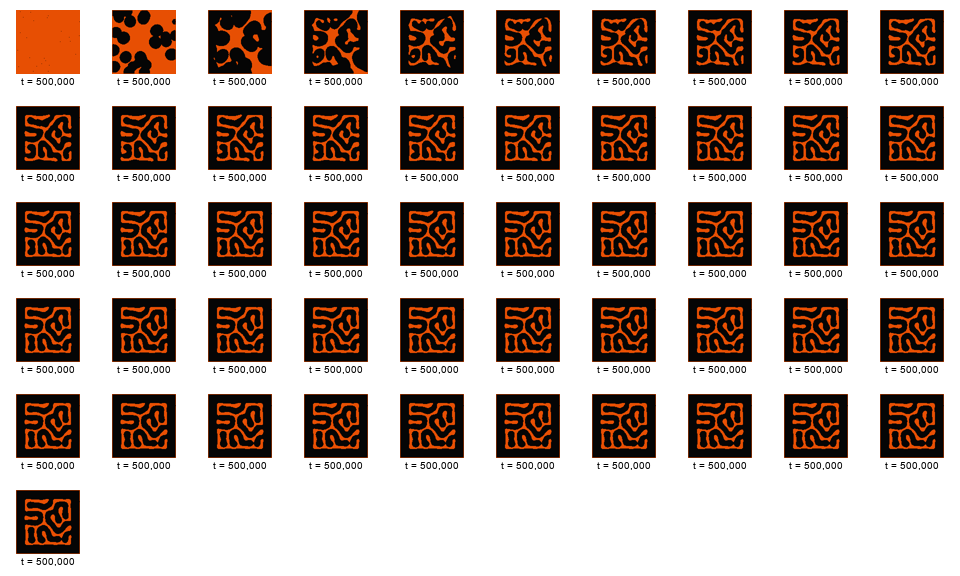

In [ ]:
img_patterns = merge_single_timeseries(dpath_input=dpath_images,
                                       n_cols=10,
                                       infile_header="pattern",
                                       ratio_resize=0.5,
                                       text_format="t = ",
                                       font_size=10,
                                       text_margin_ratio=.1)
img_patterns

In [ ]:
img_patterns.save(pjoin(dpath_output, "output_pattern.png"))

## Make a ladybug from parameters

From: tutorials/tutorial02_visualize_single_morph.ipynb

In [ ]:
# import sys
# sys.path.append('/content/lpf_upper') #/lpf

In [ ]:
# !pip show lpf

import sys
import pprint

pprint.pprint(sys.path)

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/lpf-0.0.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/lpf']


In [ ]:
# %cd "/content/lpf"
# might not be necessary
import os
os.chdir('/content/lpf_upper')

%pwd
%ls "lpf/initializers"

# from lpf import initializers
from lpf.initializers import LiawInitializer


initializerfactory.py  __pycache__/
initializer.py         twocomponentconstantinitializer.py
__init__.py            twocomponentinitializer.py
liawinitializer.py


In [ ]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime

import numpy as np
np.seterr(all='raise')

from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [ ]:
batch_size = 1  # A single set of parameters
# TODO debug gpu option
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 10000 # 1000000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [ ]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [ ]:
# Create a dict for parameters.
param_dict =  {
 "u0": 1.9530066532565284,
 "v0": 2.3936837749803437,
 "Du": 0.000497858463742147,
 "Dv": 0.07796387325338522,
 "ru": 0.1829963268369453,
 "rv": 0.10001543043288767,
 "k": 0.15824185494975906,
 "su": 0.0004593283228100326,
 "sv": 0.021391505467616145,
 "mu": 0.09084717479481387
}

In [ ]:
# In this example, we use 20 positions for initializing u with u0.
param_dict["init_pts_0"] = (20, 81)
param_dict["init_pts_1"] = (16, 27)
param_dict["init_pts_2"] = (85, 93)
param_dict["init_pts_3"] = (28, 39)
param_dict["init_pts_4"] = (119, 77)
param_dict["init_pts_5"] = (105, 39)
param_dict["init_pts_6"] = (68, 92)
param_dict["init_pts_7"] = (57, 46)
param_dict["init_pts_8"] = (53, 82)
param_dict["init_pts_9"] = (73, 78)
param_dict["init_pts_10"] = (25, 8)
param_dict["init_pts_11"] = (98, 23)
param_dict["init_pts_12"] = (74, 46)
param_dict["init_pts_13"] = (117, 45)
param_dict["init_pts_14"] = (58, 65)
param_dict["init_pts_15"] = (70, 75)
param_dict["init_pts_16"] = (71, 108)
param_dict["init_pts_17"] = (106, 36)
param_dict["init_pts_18"] = (125, 72)
param_dict["init_pts_19"] = (105, 84)

In [ ]:
param_dict

{'u0': 1.9530066532565284,
 'v0': 2.3936837749803437,
 'Du': 0.000497858463742147,
 'Dv': 0.07796387325338522,
 'ru': 0.1829963268369453,
 'rv': 0.10001543043288767,
 'k': 0.15824185494975906,
 'su': 0.0004593283228100326,
 'sv': 0.021391505467616145,
 'mu': 0.09084717479481387,
 'init_pts_0': (20, 81),
 'init_pts_1': (16, 27),
 'init_pts_2': (85, 93),
 'init_pts_3': (28, 39),
 'init_pts_4': (119, 77),
 'init_pts_5': (105, 39),
 'init_pts_6': (68, 92),
 'init_pts_7': (57, 46),
 'init_pts_8': (53, 82),
 'init_pts_9': (73, 78),
 'init_pts_10': (25, 8),
 'init_pts_11': (98, 23),
 'init_pts_12': (74, 46),
 'init_pts_13': (117, 45),
 'init_pts_14': (58, 65),
 'init_pts_15': (70, 75),
 'init_pts_16': (71, 108),
 'init_pts_17': (106, 36),
 'init_pts_18': (125, 72),
 'init_pts_19': (105, 84)}

In [ ]:
model_dicts = []
model_dicts.append(param_dict)

In [ ]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [ ]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [ ]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=0
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

Elapsed time: 3.450543 sec.


In [ ]:
arr_color = model.colorize(thr_color=0.5)
img_ladybird, img_pattern = model.create_image(0, arr_color)

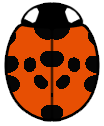

In [ ]:
img_ladybird

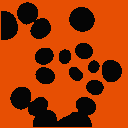

In [ ]:
img_pattern

In [ ]:
model.save_image(index=0,
                 fpath_ladybird=pjoin(dpath_output, "ladybird.png"),
                 fpath_pattern=pjoin(dpath_output, "pattern.png"),
                 arr_color=arr_color)

In [ ]:
# !ls {dpath_output}

ladybird.png
model_1
models
pattern.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x280f726afa0>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
